In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from category_encoders import TargetEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, roc_auc_score,classification_report,accuracy_score
from sklearn.metrics import precision_recall_curve, auc
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,GradientBoostingClassifier

In [2]:
import warnings
warnings.simplefilter('ignore')

#### Loading The Dataset

In [3]:
df = pd.read_csv('ola_driver_scaler.csv')
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [4]:
# The Shape of the loaded dataset
df.shape

(19104, 14)

In [5]:
# Retrieving the columns of the dataset
df.columns

Index(['Unnamed: 0', 'MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

In [6]:
df.drop('Unnamed: 0',axis=1,inplace = True)

In [7]:
# Information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [8]:
#Converting the Series with data type object to datetime
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

In [9]:
# Retreiving the unique entries count present in each column
for i in df.columns:
    print(f"Unique entries for column {i} = {df[i].nunique()}" )

Unique entries for column MMM-YY = 24
Unique entries for column Driver_ID = 2381
Unique entries for column Age = 36
Unique entries for column Gender = 2
Unique entries for column City = 29
Unique entries for column Education_Level = 3
Unique entries for column Income = 2383
Unique entries for column Dateofjoining = 869
Unique entries for column LastWorkingDate = 493
Unique entries for column Joining Designation = 5
Unique entries for column Grade = 5
Unique entries for column Total Business Value = 10181
Unique entries for column Quarterly Rating = 4


In [10]:
# Extract month,year and week name from the date_column

df['ReportingMonth'] = df['MMM-YY'].dt.month_name()
df['ReportingYear'] = df['MMM-YY'].dt.year
df['ReportingWeek'] = df['MMM-YY'].dt.strftime('%A')

df['JoiningMonth'] = df['Dateofjoining'].dt.month_name()
df['JoiningYear'] = df['Dateofjoining'].dt.year
df['JoiningWeek'] = df['Dateofjoining'].dt.strftime('%A')

df['LastWorkingMonth'] = df['LastWorkingDate'].dt.month_name()
df['LastWorkingYear'] = df['LastWorkingDate'].dt.year
df['LastWorkingWeek'] = df['LastWorkingDate'].dt.strftime('%A')

df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,...,Quarterly Rating,ReportingMonth,ReportingYear,ReportingWeek,JoiningMonth,JoiningYear,JoiningWeek,LastWorkingMonth,LastWorkingYear,LastWorkingWeek
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,...,2,January,2019,Tuesday,December,2018,Monday,NaN,NaN,NaN
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,...,2,February,2019,Friday,December,2018,Monday,NaN,NaN,NaN
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,...,2,March,2019,Friday,December,2018,Monday,March,2019.0,Monday
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,...,1,November,2020,Sunday,November,2020,Friday,NaN,NaN,NaN
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,...,1,December,2020,Tuesday,November,2020,Friday,NaN,NaN,NaN


In [11]:
df.drop(['MMM-YY','Dateofjoining'],axis=1,inplace = True)

#### KNN Imputation of Missing Values

In [12]:
columns_to_impute = ['Age', 'Gender']

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5)

df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

df.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,ReportingMonth,ReportingYear,ReportingWeek,JoiningMonth,JoiningYear,JoiningWeek,LastWorkingMonth,LastWorkingYear,LastWorkingWeek
0,1,28.0,0.0,C23,2,57387,NaT,1,1,2381060,2,January,2019,Tuesday,December,2018,Monday,NaN,NaN,NaN
1,1,28.0,0.0,C23,2,57387,NaT,1,1,-665480,2,February,2019,Friday,December,2018,Monday,NaN,NaN,NaN
2,1,28.0,0.0,C23,2,57387,2019-03-11,1,1,0,2,March,2019,Friday,December,2018,Monday,March,2019.0,Monday
3,2,31.0,0.0,C7,2,67016,NaT,2,2,0,1,November,2020,Sunday,November,2020,Friday,NaN,NaN,NaN
4,2,31.0,0.0,C7,2,67016,NaT,2,2,0,1,December,2020,Tuesday,November,2020,Friday,NaN,NaN,NaN


In [13]:
# Convert the 'Age' and 'Gender' column to integer
df['Age'] = df['Age'].astype(int)

df['Gender'] = df['Gender'].astype(int)

#### Target Variable Creation

In [14]:
# Create the 'target' column
df['target'] = df['LastWorkingDate'].notnull().astype(int)
df.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,LastWorkingDate,Joining Designation,Grade,Total Business Value,...,ReportingMonth,ReportingYear,ReportingWeek,JoiningMonth,JoiningYear,JoiningWeek,LastWorkingMonth,LastWorkingYear,LastWorkingWeek,target
0,1,28,0,C23,2,57387,NaT,1,1,2381060,...,January,2019,Tuesday,December,2018,Monday,NaN,NaN,NaN,0
1,1,28,0,C23,2,57387,NaT,1,1,-665480,...,February,2019,Friday,December,2018,Monday,NaN,NaN,NaN,0
2,1,28,0,C23,2,57387,2019-03-11,1,1,0,...,March,2019,Friday,December,2018,Monday,March,2019.0,Monday,1
3,2,31,0,C7,2,67016,NaT,2,2,0,...,November,2020,Sunday,November,2020,Friday,NaN,NaN,NaN,0
4,2,31,0,C7,2,67016,NaT,2,2,0,...,December,2020,Tuesday,November,2020,Friday,NaN,NaN,NaN,0


In [15]:
df.drop(['LastWorkingDate'],axis=1,inplace = True)

In [16]:
df = df.sort_values(by=['Driver_ID']).reset_index(drop=True)

# Creating a column which tells whether the quarterly rating has increased.
df['Rating_Increase'] = df.groupby('Driver_ID')['Quarterly Rating'].diff().gt(0).astype(int)

# Creating a column which tells whether the Income has increased.
df['Income_Increase'] = df.groupby('Driver_ID')['Income'].diff().gt(0).astype(int)

In [17]:
df.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,...,ReportingWeek,JoiningMonth,JoiningYear,JoiningWeek,LastWorkingMonth,LastWorkingYear,LastWorkingWeek,target,Rating_Increase,Income_Increase
0,1,28,0,C23,2,57387,1,1,2381060,2,...,Tuesday,December,2018,Monday,NaN,NaN,NaN,0,0,0
1,1,28,0,C23,2,57387,1,1,-665480,2,...,Friday,December,2018,Monday,NaN,NaN,NaN,0,0,0
2,1,28,0,C23,2,57387,1,1,0,2,...,Friday,December,2018,Monday,March,2019.0,Monday,1,0,0
3,2,31,0,C7,2,67016,2,2,0,1,...,Sunday,November,2020,Friday,NaN,NaN,NaN,0,0,0
4,2,31,0,C7,2,67016,2,2,0,1,...,Tuesday,November,2020,Friday,NaN,NaN,NaN,0,0,0


#### Data Aggregation

In [18]:
agg_df = df.groupby('Driver_ID').agg({
    'Age': 'first',
    'Gender': 'first',
    'City': 'first',
    'Education_Level': 'first',
    'Income': 'max',
    'Joining Designation': 'first',
    'Grade': 'first',
    'Total Business Value': 'sum',
    'Quarterly Rating': 'max',
    'ReportingMonth': 'first',
    'ReportingYear': 'first',
    'ReportingWeek': 'first',
    'JoiningMonth': 'first',
    'JoiningYear': 'first',
    'JoiningWeek': 'first',
    'LastWorkingMonth': 'last',
    'LastWorkingYear': 'last',
    'LastWorkingWeek': 'last',
    'target':'max',
    'Rating_Increase' : 'max',
    'Income_Increase' : 'max'
}).reset_index()

#### Missing Values Treatment 

In [19]:
agg_df[['LastWorkingMonth','LastWorkingYear','LastWorkingWeek']] = agg_df[['LastWorkingMonth','LastWorkingYear','LastWorkingWeek']].fillna('NA')
agg_df.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,...,ReportingWeek,JoiningMonth,JoiningYear,JoiningWeek,LastWorkingMonth,LastWorkingYear,LastWorkingWeek,target,Rating_Increase,Income_Increase
0,1,28,0,C23,2,57387,1,1,1715580,2,...,Tuesday,December,2018,Monday,March,2019.0,Monday,1,0,0
1,2,31,0,C7,2,67016,2,2,0,1,...,Sunday,November,2020,Friday,NA,NA,NA,0,0,0
2,4,43,0,C13,2,65603,2,2,350000,1,...,Sunday,December,2019,Saturday,April,2020.0,Monday,1,0,0
3,5,29,0,C9,0,46368,1,1,120360,1,...,Tuesday,January,2019,Wednesday,March,2019.0,Thursday,1,0,0
4,6,31,1,C11,1,78728,3,3,1265000,2,...,Tuesday,July,2020,Friday,NA,NA,NA,0,1,0


In [20]:
agg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Driver_ID             2381 non-null   int64 
 1   Age                   2381 non-null   int32 
 2   Gender                2381 non-null   int32 
 3   City                  2381 non-null   object
 4   Education_Level       2381 non-null   int64 
 5   Income                2381 non-null   int64 
 6   Joining Designation   2381 non-null   int64 
 7   Grade                 2381 non-null   int64 
 8   Total Business Value  2381 non-null   int64 
 9   Quarterly Rating      2381 non-null   int64 
 10  ReportingMonth        2381 non-null   object
 11  ReportingYear         2381 non-null   int32 
 12  ReportingWeek         2381 non-null   object
 13  JoiningMonth          2381 non-null   object
 14  JoiningYear           2381 non-null   int32 
 15  JoiningWeek           2381 non-null   

In [21]:
agg_df.isnull().sum()

Driver_ID               0
Age                     0
Gender                  0
City                    0
Education_Level         0
Income                  0
Joining Designation     0
Grade                   0
Total Business Value    0
Quarterly Rating        0
ReportingMonth          0
ReportingYear           0
ReportingWeek           0
JoiningMonth            0
JoiningYear             0
JoiningWeek             0
LastWorkingMonth        0
LastWorkingYear         0
LastWorkingWeek         0
target                  0
Rating_Increase         0
Income_Increase         0
dtype: int64

In [22]:
# Retreiving the unique entries count present in each column
for i in agg_df.columns:
    print(f"Unique entries for column {i} = {df[i].nunique()}" )

Unique entries for column Driver_ID = 2381
Unique entries for column Age = 36
Unique entries for column Gender = 2
Unique entries for column City = 29
Unique entries for column Education_Level = 3
Unique entries for column Income = 2383
Unique entries for column Joining Designation = 5
Unique entries for column Grade = 5
Unique entries for column Total Business Value = 10181
Unique entries for column Quarterly Rating = 4
Unique entries for column ReportingMonth = 12
Unique entries for column ReportingYear = 2
Unique entries for column ReportingWeek = 7
Unique entries for column JoiningMonth = 12
Unique entries for column JoiningYear = 8
Unique entries for column JoiningWeek = 7
Unique entries for column LastWorkingMonth = 12
Unique entries for column LastWorkingYear = 3
Unique entries for column LastWorkingWeek = 7
Unique entries for column target = 2
Unique entries for column Rating_Increase = 2
Unique entries for column Income_Increase = 2


#### Checking for Duplicated data

In [23]:
duplicates_any = agg_df[agg_df.duplicated()]
duplicates_any

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,...,ReportingWeek,JoiningMonth,JoiningYear,JoiningWeek,LastWorkingMonth,LastWorkingYear,LastWorkingWeek,target,Rating_Increase,Income_Increase


In [24]:
# Description of the dataset.
agg_df.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,ReportingYear,JoiningYear,target,Rating_Increase,Income_Increase
count,2381.000000,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,1397.559009,33.461991,0.411592,1.00756,59336.159597,1.820244,2.083158,4.586742e+06,1.929861,2019.578748,2018.536329,0.678706,0.413692,0.015540
std,806.161628,5.933165,0.492225,0.81629,28383.012146,0.841433,0.934299,9.127115e+06,1.104857,0.493863,1.609597,0.467071,0.492598,0.123712
min,1.000000,21.000000,0.000000,0.00000,10747.000000,1.000000,1.000000,-1.385530e+06,1.000000,2019.000000,2013.000000,0.000000,0.000000,0.000000
25%,695.000000,29.000000,0.000000,0.00000,39104.000000,1.000000,1.000000,0.000000e+00,1.000000,2019.000000,2018.000000,0.000000,0.000000,0.000000
50%,1400.000000,33.000000,0.000000,1.00000,55315.000000,2.000000,2.000000,8.176800e+05,1.000000,2020.000000,2019.000000,1.000000,0.000000,0.000000
75%,2100.000000,37.000000,1.000000,2.00000,75986.000000,2.000000,3.000000,4.173650e+06,3.000000,2020.000000,2020.000000,1.000000,1.000000,0.000000
max,2788.000000,58.000000,1.000000,2.00000,188418.000000,5.000000,5.000000,9.533106e+07,4.000000,2020.000000,2020.000000,1.000000,1.000000,1.000000


In [25]:
agg_df.describe(include=['object'])

,City,ReportingMonth,ReportingWeek,JoiningMonth,JoiningWeek,LastWorkingMonth,LastWorkingYear,LastWorkingWeek
count,2381,2381,2381,2381,2381,2381,2381.0,2381
unique,29,12,7,12,7,13,4.0,8
top,C20,January,Tuesday,July,Friday,NA,2019.0,NA
freq,152,401,769,296,587,765,825.0,765


#### Data Visualization : Univariate and Bivariate Visualization

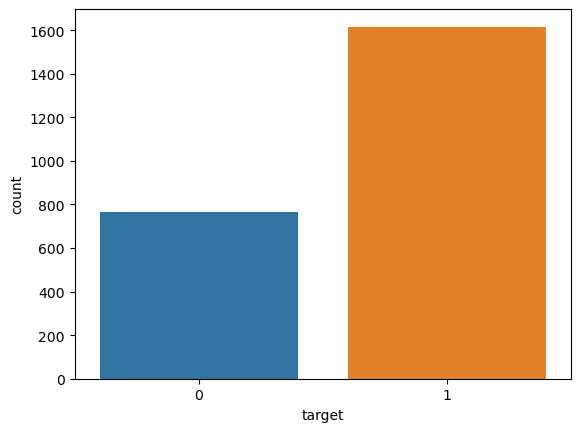

In [26]:
# Plotting a countplot for target column .
sns.countplot(data=agg_df,x='target')
plt.show()

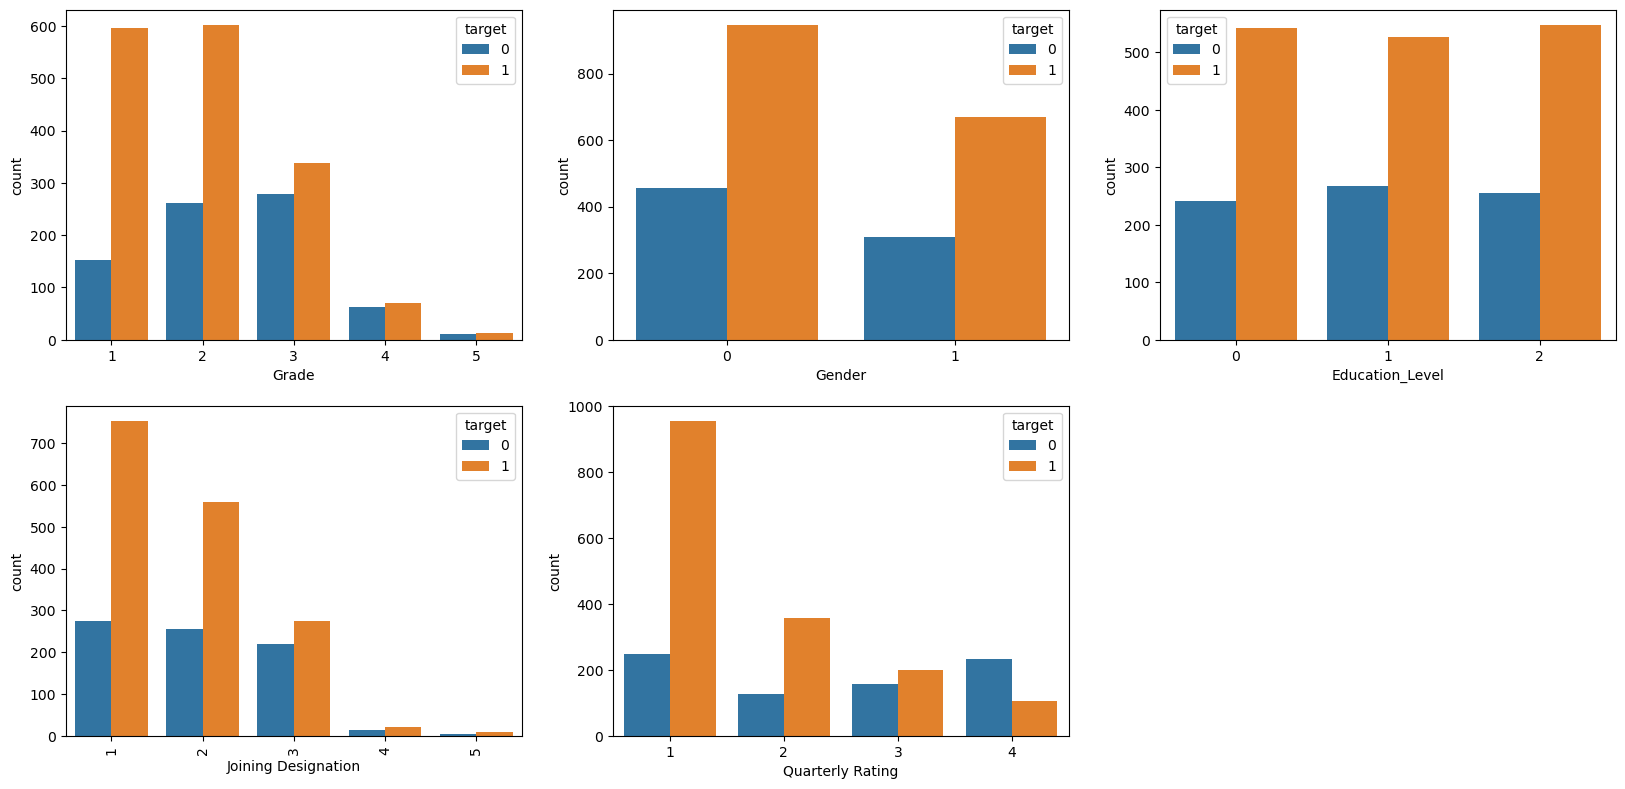

In [27]:
plt.figure(figsize=(20, 30))

plt.subplot(6, 3, 1)
sns.countplot(x='Grade', data=agg_df, hue='target')

plt.subplot(6, 3, 2)
sns.countplot(x='Gender', data=agg_df, hue='target')

plt.subplot(6, 3, 3)
sns.countplot(x='Education_Level', data=agg_df, hue='target')

plt.subplot(6, 3, 4)
sns.countplot(x='Joining Designation', data=agg_df, hue='target')
plt.xticks(rotation=90)

plt.subplot(6, 3, 5)
sns.countplot(x='Quarterly Rating', data=agg_df, hue='target')

plt.show()

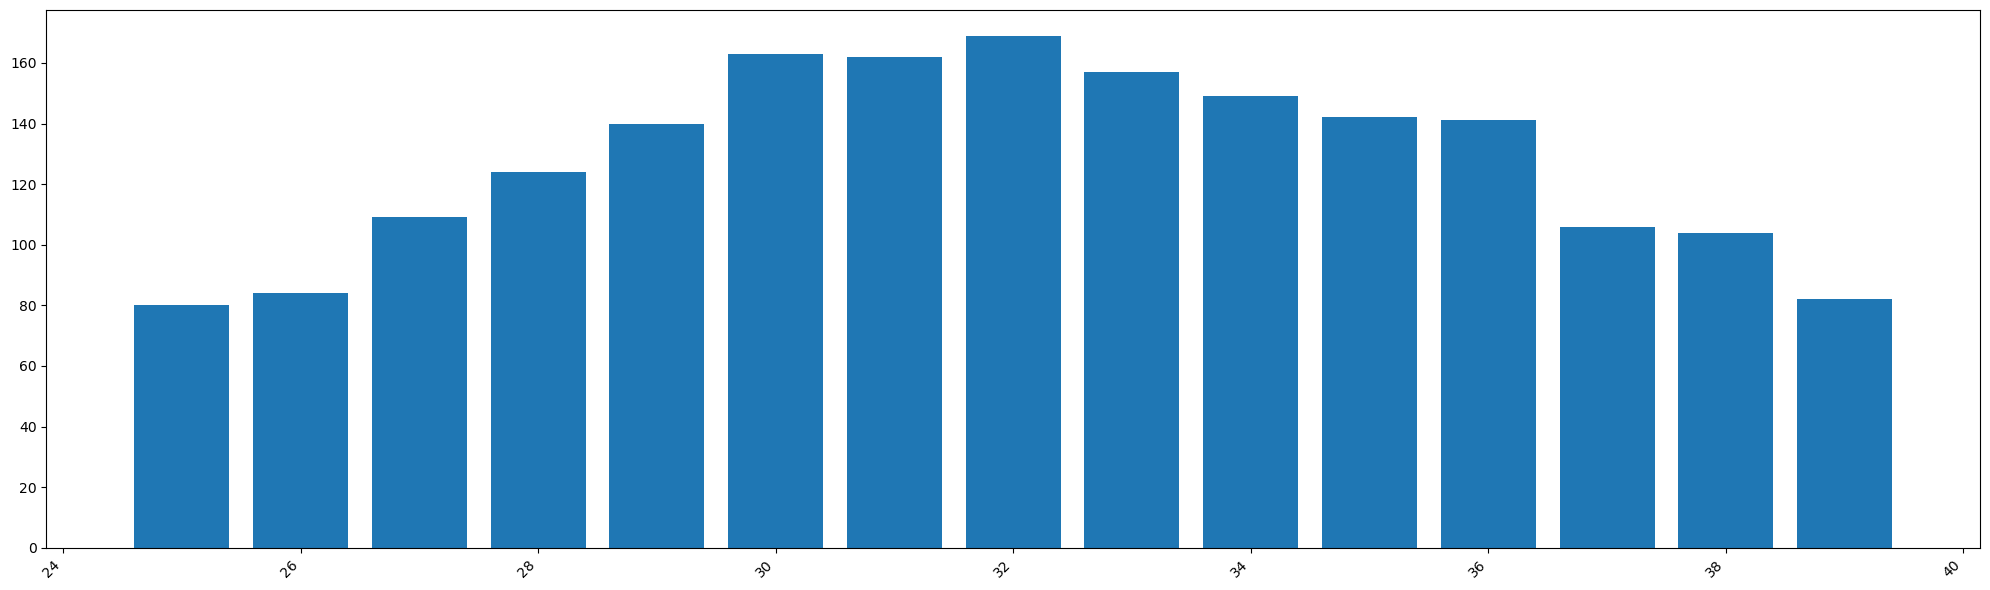

In [28]:
count_per_age = agg_df['Age'].value_counts().head(15).reset_index()
count_per_age.columns = ['Age', 'count']

plt.figure(figsize=(20, 6))

plt.bar(count_per_age['Age'], count_per_age['count'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

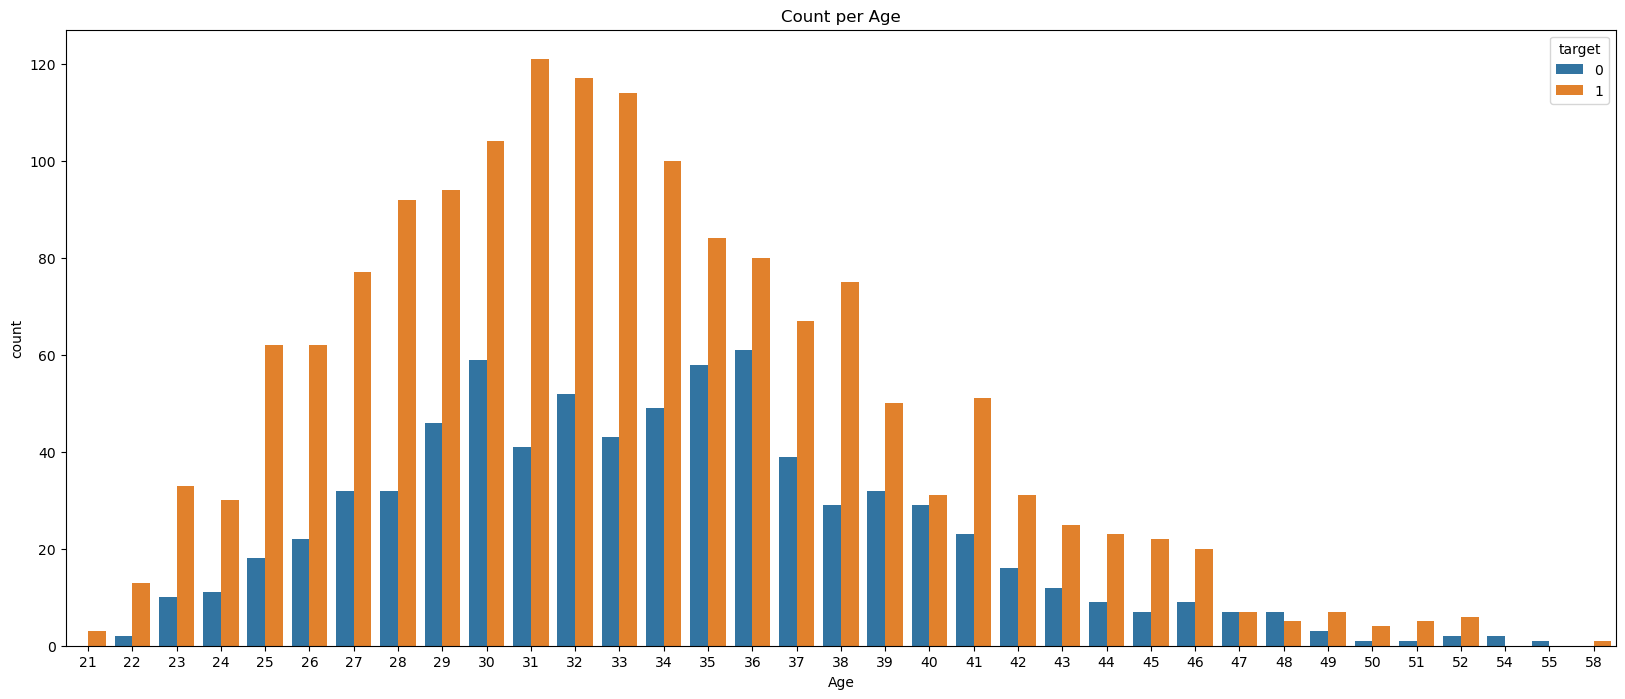

In [29]:
plt.figure(figsize=(20, 8))
sns.countplot(x='Age', data=agg_df, hue='target')
plt.title('Count per Age')
plt.show()

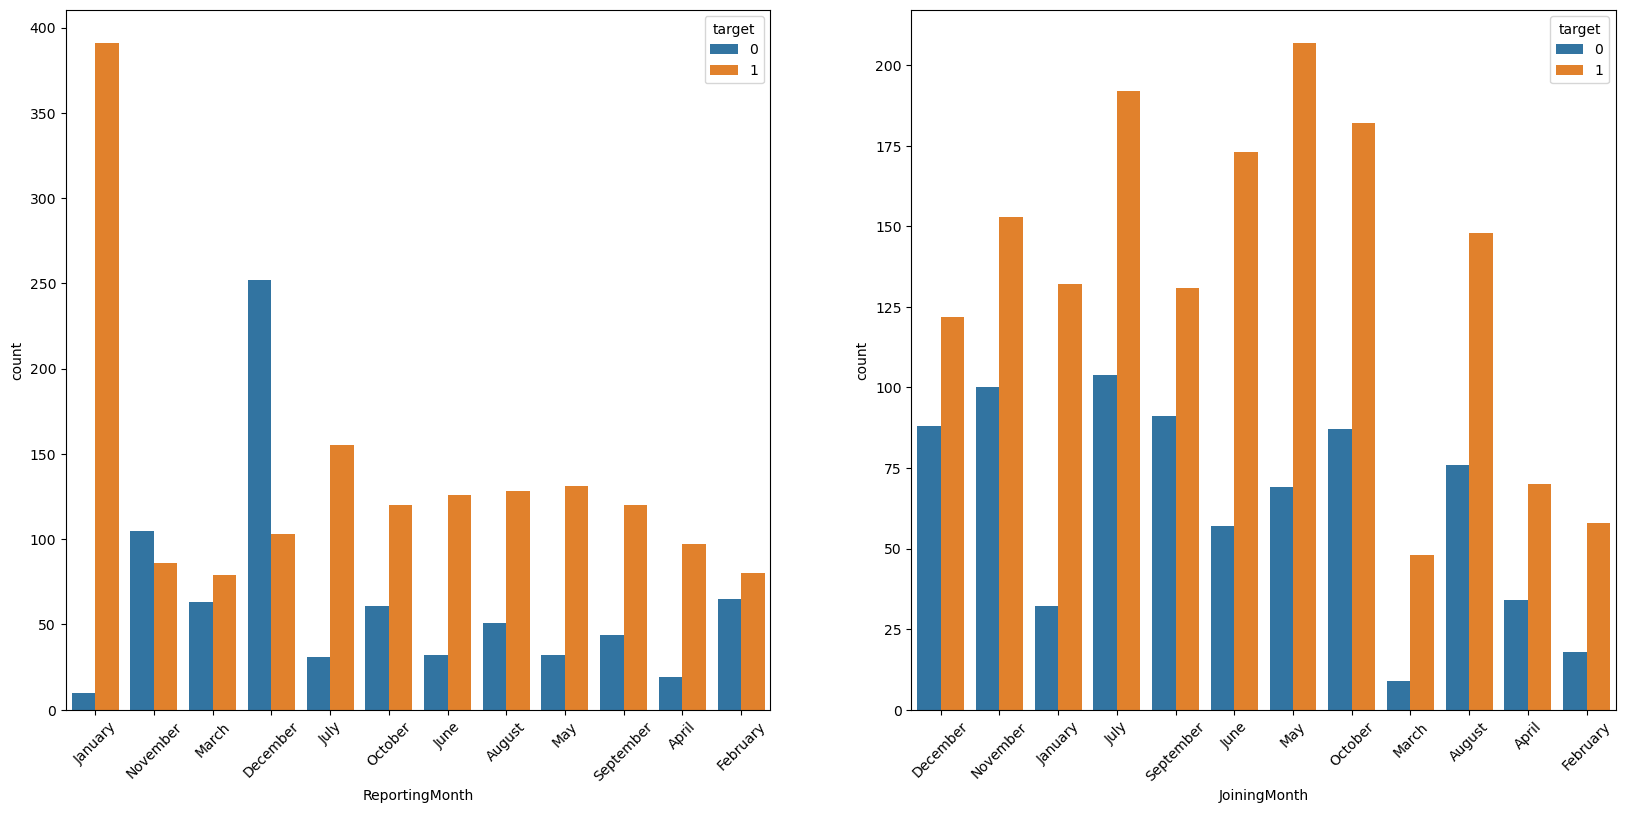

In [30]:
plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
sns.countplot(x='ReportingMonth', data=agg_df, hue='target')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.countplot(x='JoiningMonth', data=agg_df, hue='target')
plt.xticks(rotation=45)

plt.show()

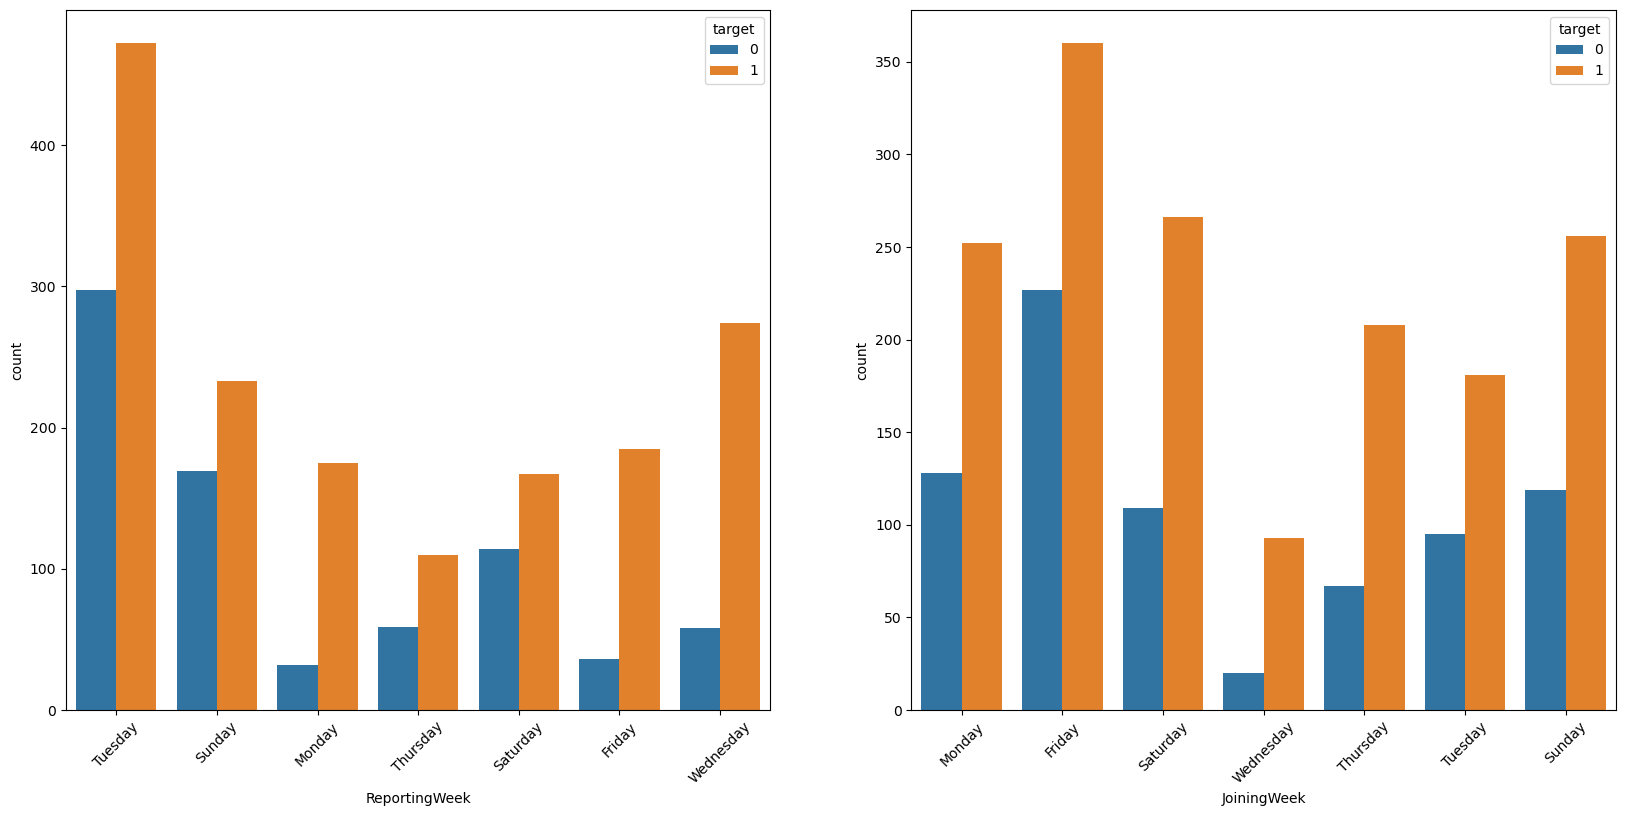

In [31]:
plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
sns.countplot(x='ReportingWeek', data=agg_df, hue='target')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.countplot(x='JoiningWeek', data=agg_df, hue='target')
plt.xticks(rotation=45)

plt.show()

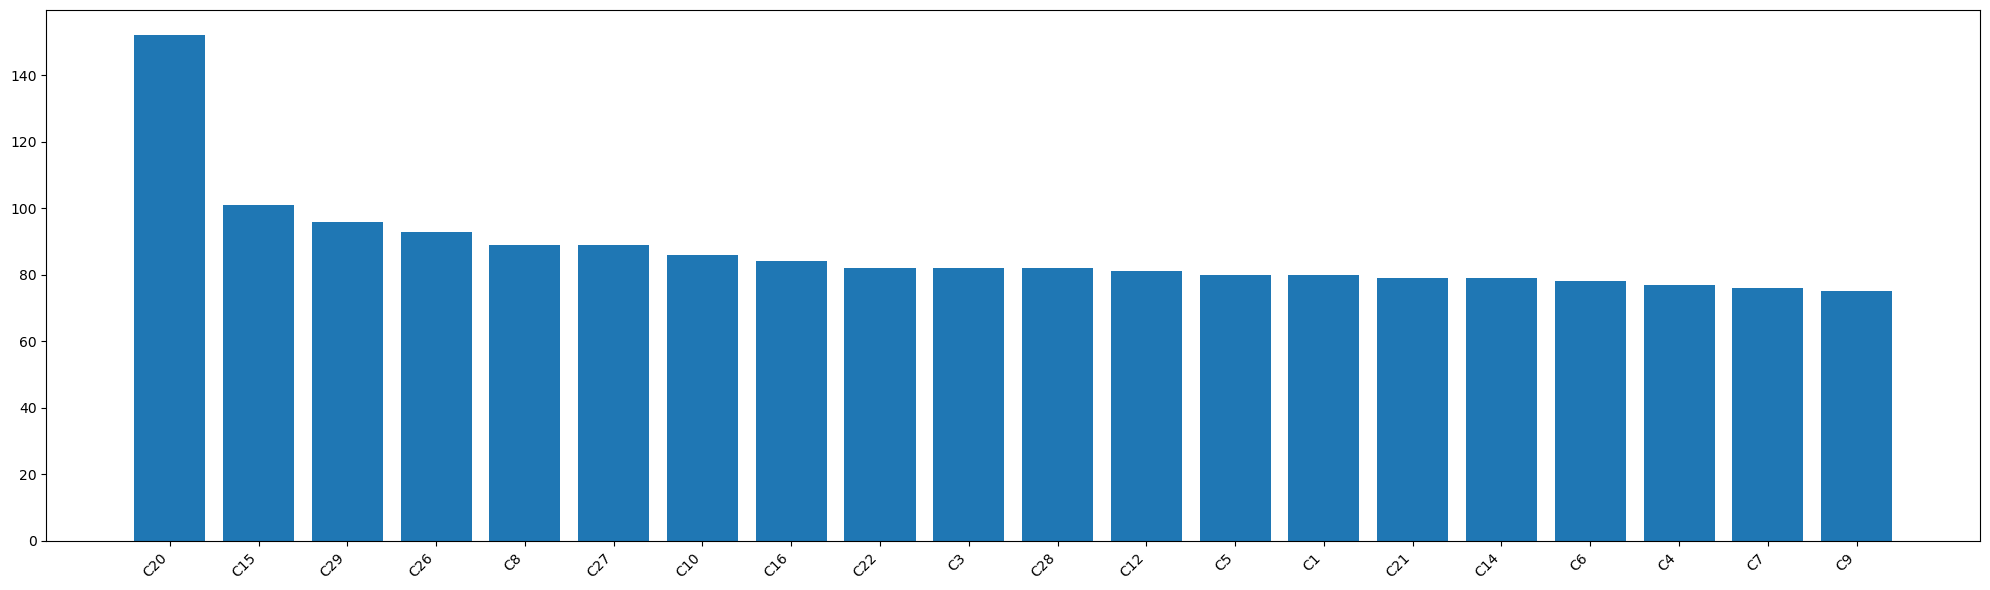

In [32]:
city_count = agg_df['City'].value_counts().head(20).reset_index()
city_count.columns = ['City', 'count']

plt.figure(figsize=(20, 6))

plt.bar(city_count['City'], city_count['count'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

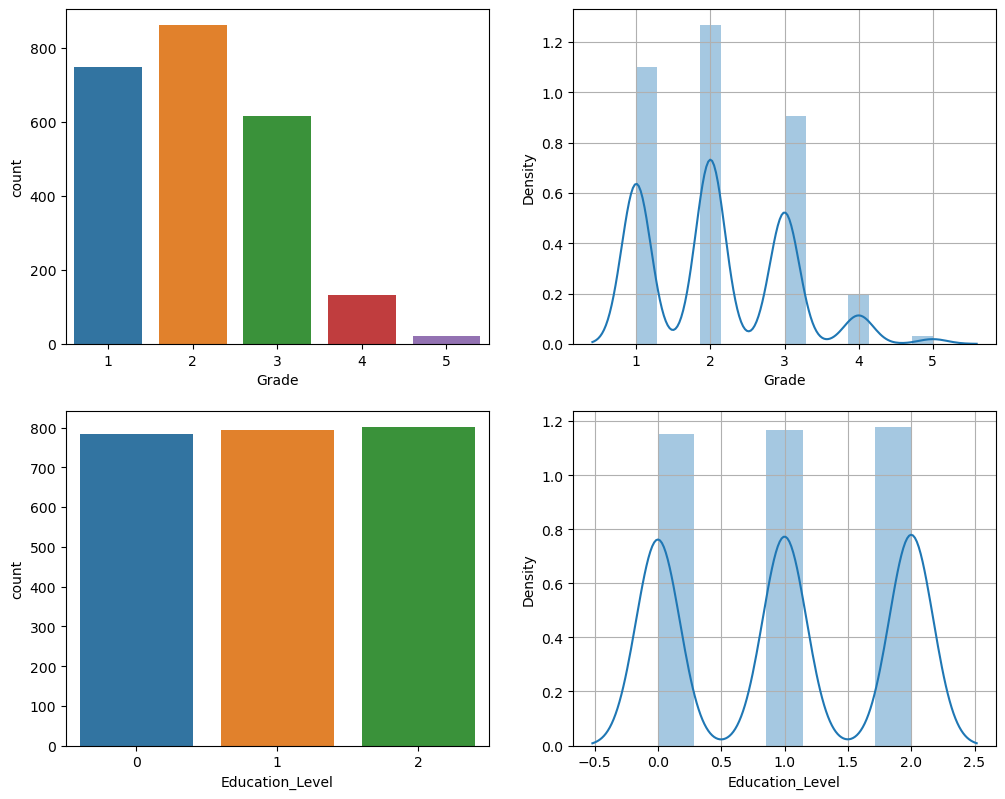

In [33]:
plt.figure(figsize=(12, 20))

# Plotting a countplot for Grade column.
plt.subplot(4, 2, 1)
sns.countplot(x='Grade',data=agg_df)

# Plotting a displot for the column Grade
plt.subplot(4, 2, 2)
sns.distplot(agg_df['Grade'])
plt.grid()

# Plotting a countplot for Education_Level column.
plt.subplot(4, 2, 3)
sns.countplot(x='Education_Level',data=agg_df)

# Plotting a displot for the column Education_Level
plt.subplot(4, 2, 4)
sns.distplot(agg_df['Education_Level'])
plt.grid()


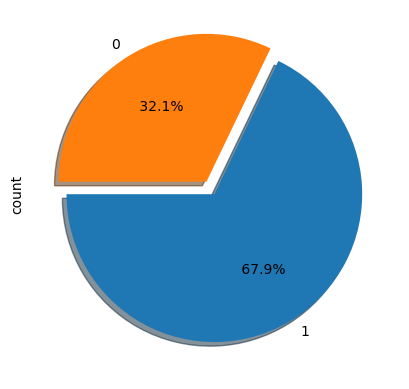

In [34]:
agg_df['target'].value_counts().plot.pie(explode = [0,0.1],autopct='% 0.1f%%',shadow=True, startangle=180)
plt.show()

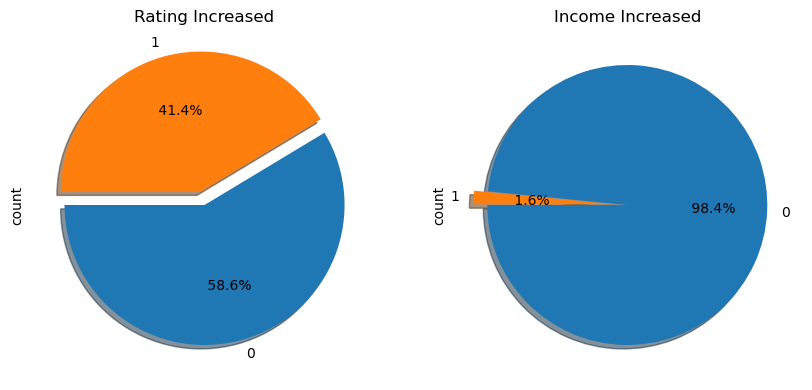

In [35]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
agg_df['Rating_Increase'].value_counts().plot.pie(explode = [0,0.1],autopct='% 0.1f%%',shadow=True, startangle=180)
plt.title('Rating Increased')

plt.subplot(2, 2, 2)
agg_df['Income_Increase'].value_counts().plot.pie(explode = [0,0.1],autopct='% 0.1f%%',shadow=True, startangle=180)
plt.title('Income Increased')
plt.show()

In [1]:
agg_df['Quarterly Rating'].value_counts().plot.pie(explode=[0,0,0, 0.1], autopct='%0.1f%%', shadow=True, startangle=90)
plt.title('Quarterly Rating Distribution')
plt.axis('equal')  
plt.show()

NameError: name 'agg_df' is not defined

In [37]:
# Calculate the change in Quarterly Rating for each city
agg_df['Quarterly Rating Change'] = agg_df.groupby('City')['Quarterly Rating'].diff()

# Find the city with the highest increase in Quarterly Rating
most_improved_city = agg_df.groupby('City')['Quarterly Rating Change'].sum().idxmax()

print("City with the most improvement in Quarterly Rating:", most_improved_city)

City with the most improvement in Quarterly Rating: C15


#### Null Hypothesis : Grade 1 has higher business value.
#### Alternate Hypothesis : Grade 1 doesn't have higher business value

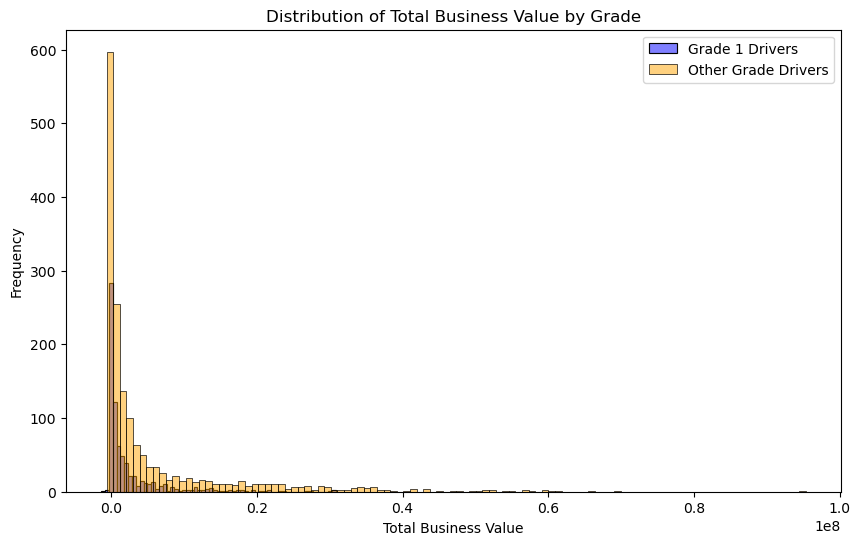

T-statistic: -7.936561769096223
P-value: 3.172140399119774e-15


In [38]:
from scipy.stats import ttest_ind

grade_a_drivers = agg_df[agg_df['Grade'] == 1]
other_grade_drivers = agg_df[agg_df['Grade'] != 1]

# Performing statistical test (e.g., t-test) to compare Total Business Value between the two groups
t_stat, p_value = ttest_ind(grade_a_drivers['Total Business Value'], other_grade_drivers['Total Business Value'])

plt.figure(figsize=(10, 6))
sns.histplot(grade_a_drivers['Total Business Value'], label='Grade 1 Drivers', color='blue', alpha=0.5)
sns.histplot(other_grade_drivers['Total Business Value'], label='Other Grade Drivers', color='orange', alpha=0.5)
plt.xlabel('Total Business Value')
plt.ylabel('Frequency')
plt.title('Distribution of Total Business Value by Grade')
plt.legend()
plt.show()

print("T-statistic:", t_stat)
print("P-value:", p_value)

#### Since the p-value is very small compared with threshold (alpha) which is 0.05 hence we conclude that Grade 1 doesn't have higher business value

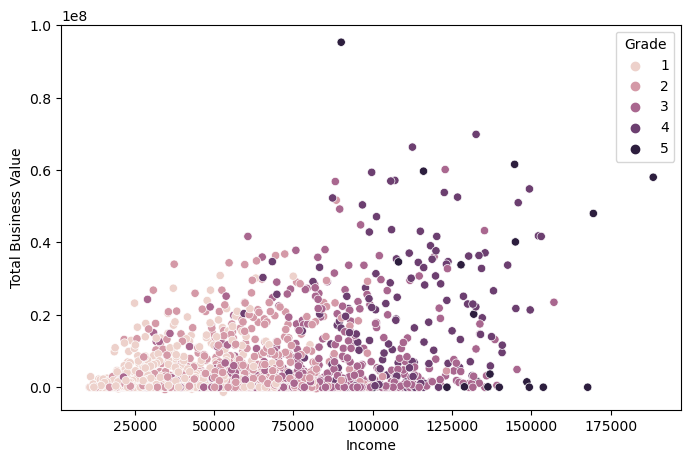

In [39]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Income',y='Total Business Value',data=agg_df,hue='Grade')
plt.show()

#### Correlation Matrix

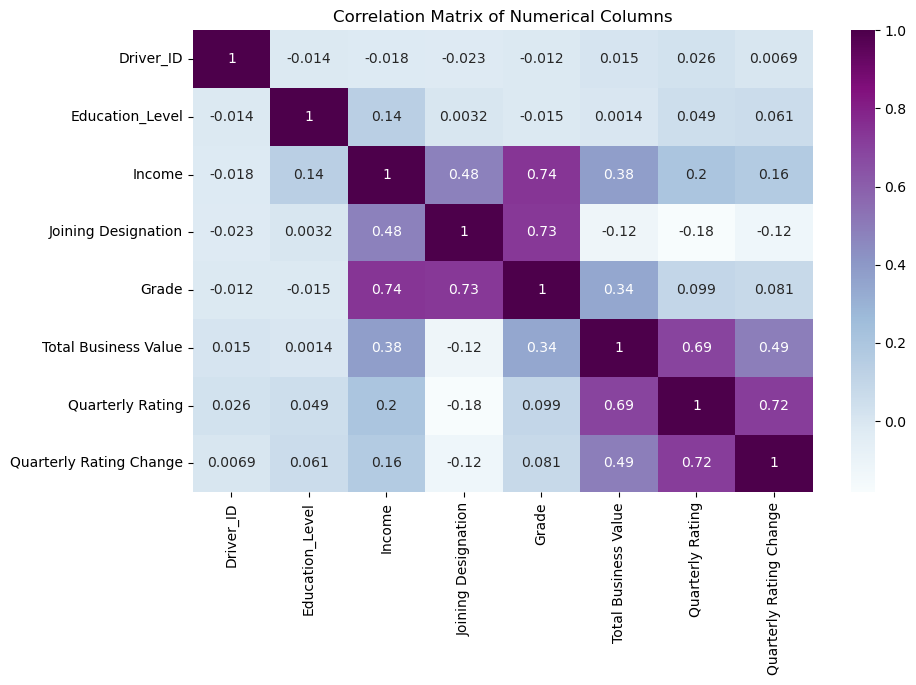

In [40]:
numerical_columns = agg_df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(10,6))
# Visualize the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu')
plt.title("Correlation Matrix of Numerical Columns")
plt.show()

In [41]:
## Checking for Correlated features.
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

correlated_features

set()

In [42]:
correlation = agg_df['Age'].corr(agg_df['Quarterly Rating'])

print("Correlation between Age and Quarterly Rating:", correlation)

Correlation between Age and Quarterly Rating: 0.20620645820750597


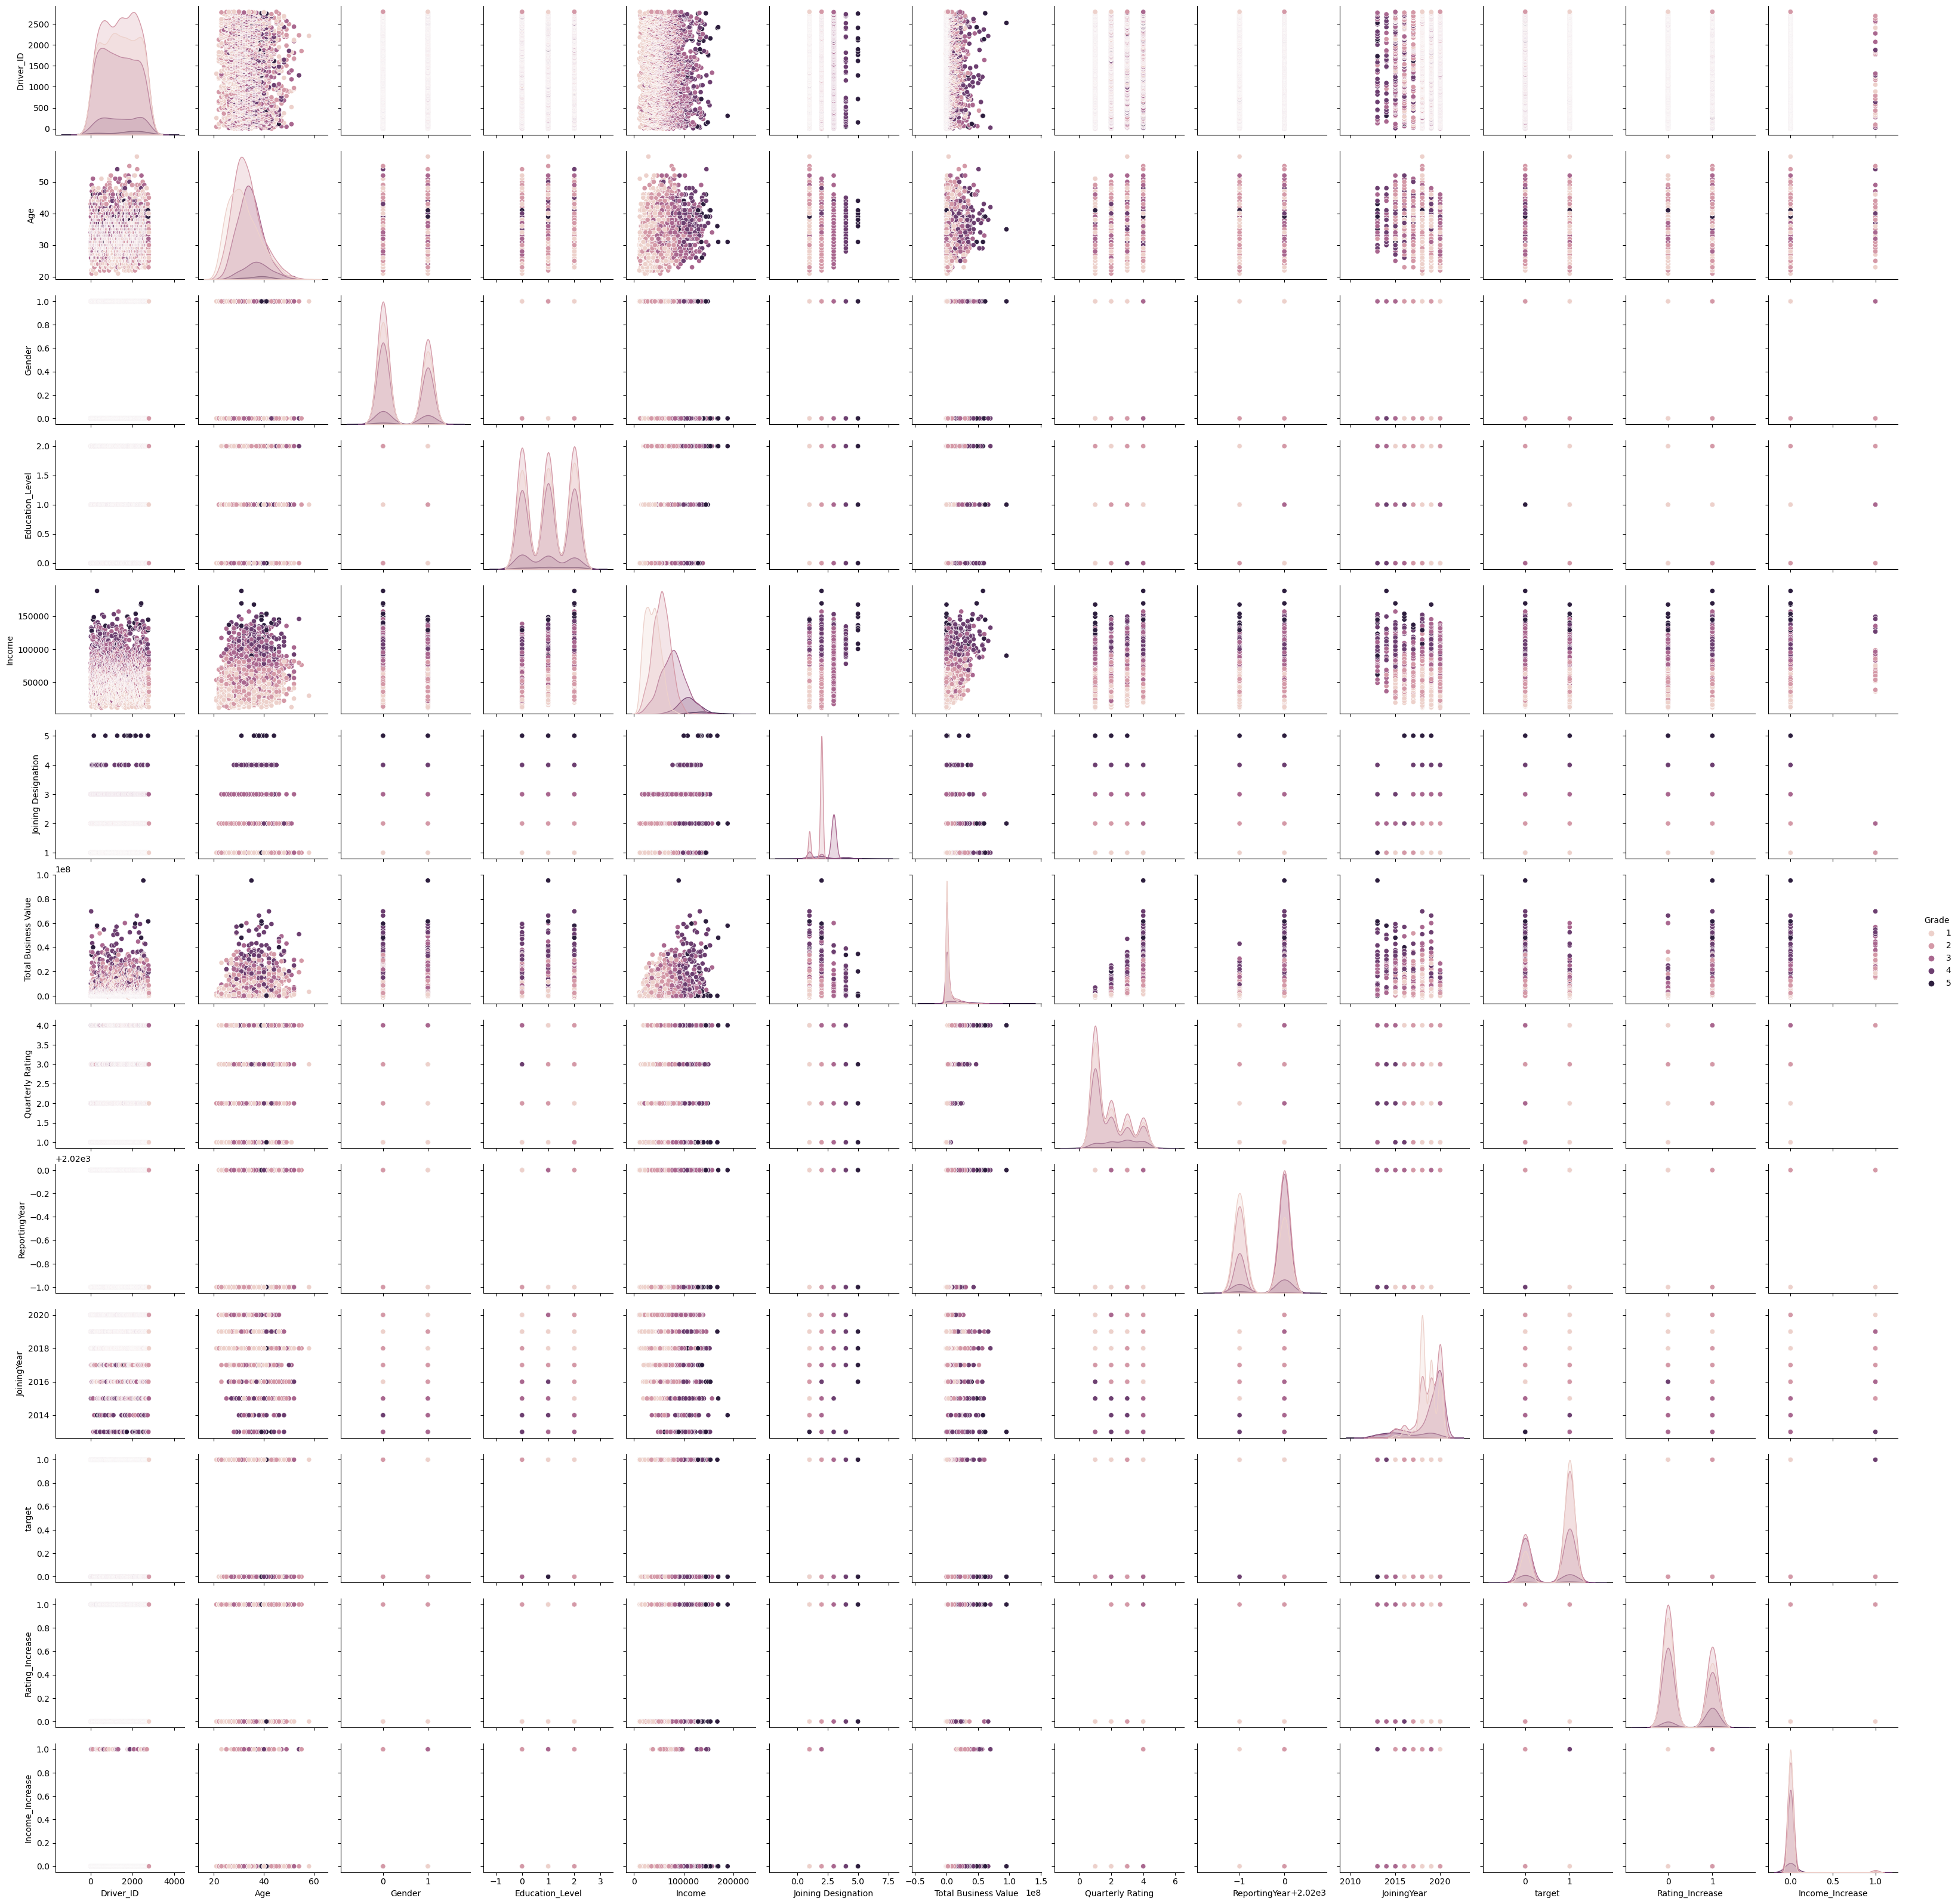

In [39]:
## we're plotting a pairplot to observe the corelation between the numerical/continuous value column.
sns.pairplot(agg_df,hue='Grade')

#### Outlier Treatment

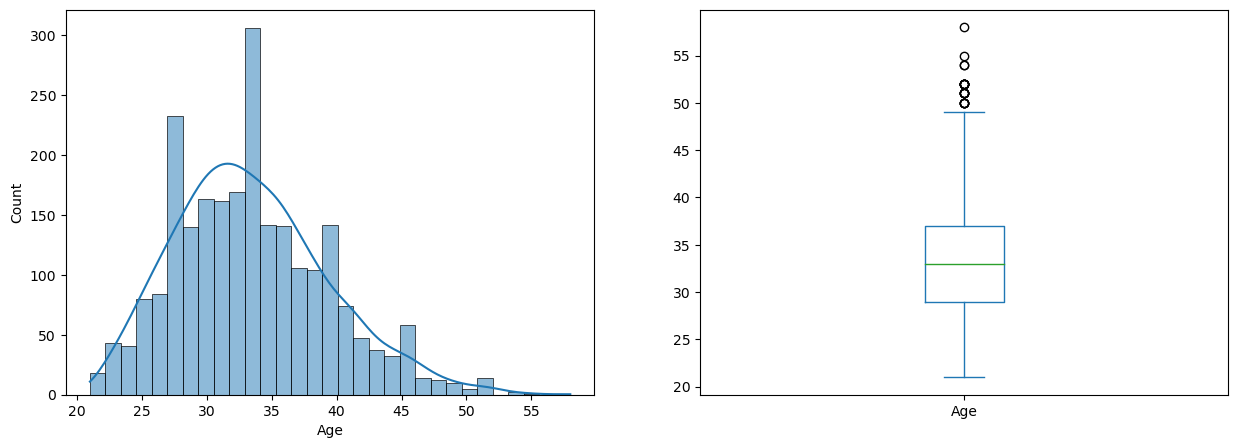

In [39]:
plt.subplot(1,2,1)
sns.histplot(agg_df['Age'],kde=True)
plt.subplot(1,2,2)
agg_df['Age'].plot.box(figsize=(15,5))
plt.show()

In [40]:
# We're calculate the IQR
Q1 = agg_df['Age'].quantile(0.25)
Q3 = agg_df['Age'].quantile(0.75)
IQR = Q3 - Q1

print(IQR)
# Defined a threshold for identifying outliers
threshold = 1.5

lower_bound = Q1 - (IQR * threshold)
upper_bound = Q3 + (IQR * threshold)

# Identify outliers based on the threshold
outliers = agg_df[(agg_df['Age'] < (Q1 - threshold * IQR)) | (agg_df['Age'] > (Q3 + threshold * IQR))]
outliers

8.0


,Driver_ID,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,...,ReportingWeek,JoiningMonth,JoiningYear,JoiningWeek,LastWorkingMonth,LastWorkingYear,LastWorkingWeek,target,Rating_Increase,Income_Increase
92,111,51,0,C13,1,73769,2,3,2167840,1,...,Saturday,December,2016,Tuesday,September,2019.0,Tuesday,1,0,0
441,517,51,1,C1,2,59796,1,1,0,1,...,Tuesday,October,2018,Tuesday,January,2019.0,Tuesday,1,0,0
760,893,50,1,C10,0,73308,1,2,17369610,4,...,Saturday,May,2016,Friday,NA,NA,NA,0,1,0
764,897,51,0,C4,1,38502,1,1,4128080,4,...,Tuesday,October,2018,Monday,March,2019.0,Friday,1,0,0
803,943,52,0,C22,0,24923,1,1,23230860,4,...,Sunday,September,2018,Saturday,NA,NA,NA,0,1,0
828,972,52,0,C1,0,47194,1,2,1978160,2,...,Tuesday,January,2016,Monday,June,2019.0,Sunday,1,0,0
999,1179,51,1,C18,1,78200,1,3,17287180,4,...,Saturday,January,2017,Friday,NA,NA,NA,0,1,0
1083,1274,54,0,C15,2,145861,1,4,50986970,4,...,Tuesday,June,2018,Friday,NA,NA,NA,0,1,1
1135,1337,50,1,C10,1,55465,2,3,2591670,3,...,Tuesday,July,2015,Thursday,October,2019.0,Tuesday,1,1,0
1181,1390,51,0,C15,0,81150,2,3,605840,1,...,Friday,November,2016,Monday,March,2019.0,Sunday,1,0,0


In [41]:
## Removing the outliers from the Age we're clipping the value between lower and upper bound.
agg_df['Age'] = agg_df['Age'].clip(lower=lower_bound, upper=upper_bound)

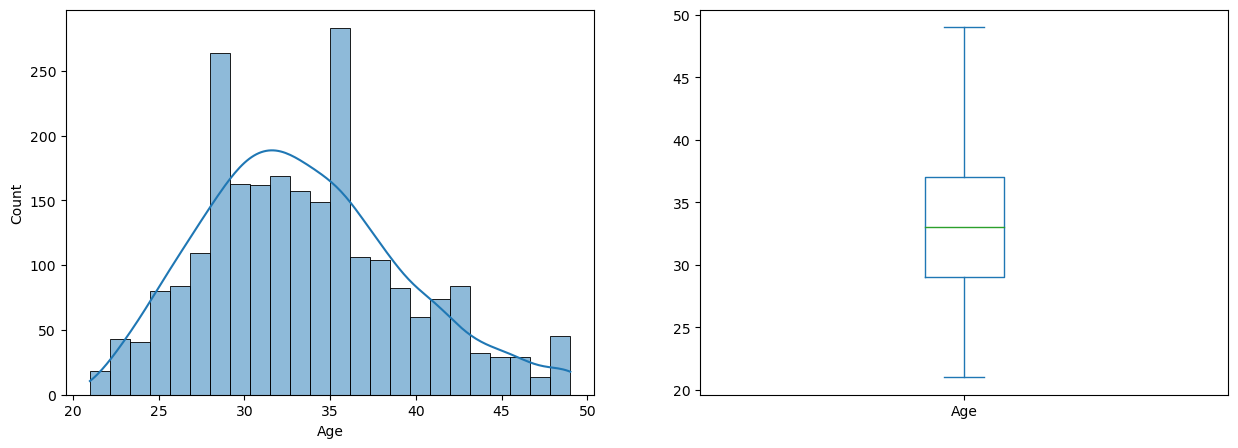

In [42]:
plt.subplot(1,2,1)
sns.histplot(agg_df['Age'],kde=True)
plt.subplot(1,2,2)
agg_df['Age'].plot.box(figsize=(15,5))
plt.show()

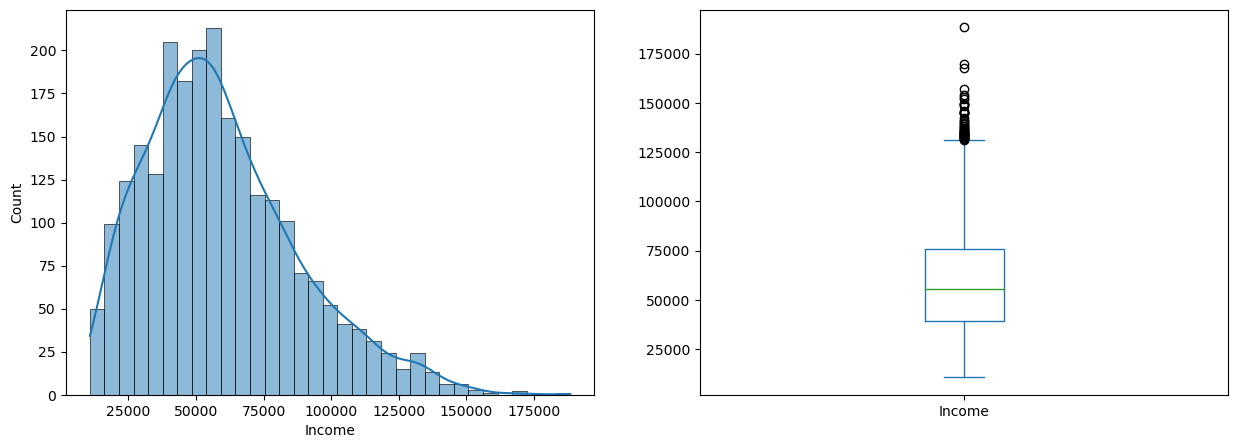

In [43]:
plt.subplot(1,2,1)
sns.histplot(agg_df['Income'],kde=True)
plt.subplot(1,2,2)
agg_df['Income'].plot.box(figsize=(15,5))
plt.show()

In [44]:
# We're calculate the IQR
Q1 = agg_df['Income'].quantile(0.25)
Q3 = agg_df['Income'].quantile(0.75)
IQR = Q3 - Q1

print(IQR)
# Defined a threshold for identifying outliers
threshold = 1.5

lower_bound = Q1 - (IQR * threshold)
upper_bound = Q3 + (IQR * threshold)

# Identify outliers based on the threshold
outliers = agg_df[(agg_df['Income'] < (Q1 - threshold * IQR)) | (agg_df['Income'] > (Q3 + threshold * IQR))]
outliers

36882.0


,Driver_ID,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,...,ReportingWeek,JoiningMonth,JoiningYear,JoiningWeek,LastWorkingMonth,LastWorkingYear,LastWorkingWeek,target,Rating_Increase,Income_Increase
18,26,42,0,C14,2,132577,1,4,69867900,4,...,Sunday,May,2018,Monday,NA,NA,NA,0,1,1
38,51,34,0,C14,0,131347,4,4,3190010,2,...,Sunday,May,2017,Monday,December,2019.0,Monday,1,1,0
98,117,46,1,C1,1,144978,1,5,40152720,4,...,Saturday,January,2016,Thursday,NA,NA,NA,0,1,0
130,153,37,1,C22,1,148588,5,5,1472800,2,...,Thursday,October,2018,Sunday,November,2019.0,Tuesday,1,1,0
200,233,36,1,C27,1,139139,3,3,500000,1,...,Wednesday,June,2020,Sunday,NA,NA,NA,0,0,0
226,271,38,0,C29,2,134529,4,4,19169110,4,...,Monday,May,2020,Friday,NA,NA,NA,0,1,0
257,308,31,0,C5,2,188418,2,5,58024490,4,...,Saturday,August,2014,Friday,NA,NA,NA,0,1,0
276,329,43,1,C11,1,133752,1,3,14717150,3,...,Saturday,July,2015,Sunday,NA,NA,NA,0,1,0
283,336,46,0,C10,2,140769,2,4,9577580,2,...,Sunday,February,2018,Saturday,July,2020.0,Wednesday,1,1,0
301,355,34,0,C22,2,135879,3,3,3163760,2,...,Thursday,June,2018,Saturday,August,2019.0,Friday,1,1,0


In [45]:
## Removing the outliers from the Income we're clipping the value between lower and upper bound.
agg_df['Income'] = agg_df['Income'].clip(lower=lower_bound, upper=upper_bound)

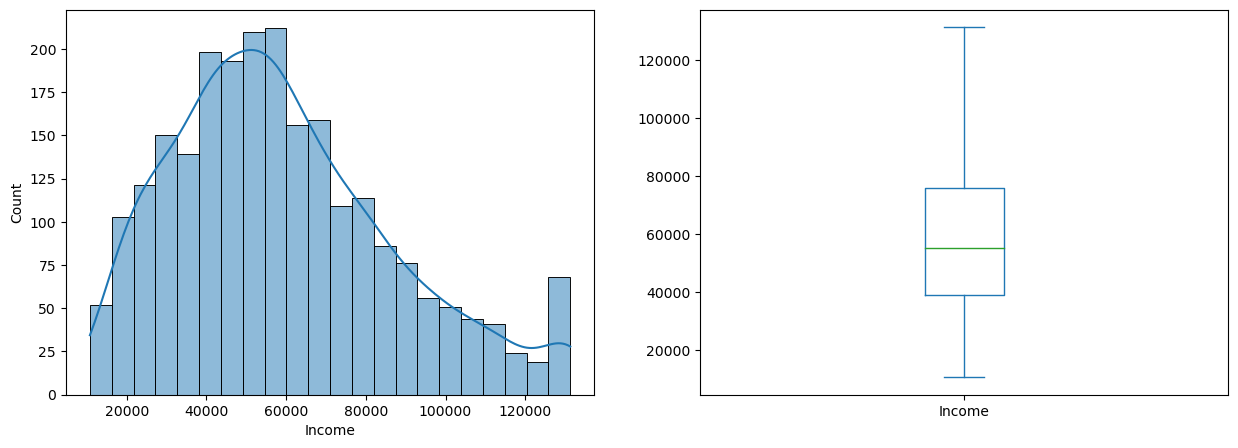

In [46]:
plt.subplot(1,2,1)
sns.histplot(agg_df['Income'],kde=True)
plt.subplot(1,2,2)
agg_df['Income'].plot.box(figsize=(15,5))
plt.show()

#### Binning : Categorizing into Age groups

In [47]:
bin_edges = [20, 28, 32, 35, 40, 45, float('inf')]

bin_labels = ['20-27', '28-31', '32-34', '35-39', '40-44', '45+'] 

agg_df['Age_Binned'] = pd.cut(agg_df['Age'], bins=bin_edges, labels=bin_labels, right=False)

In [48]:
agg_df

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,...,JoiningMonth,JoiningYear,JoiningWeek,LastWorkingMonth,LastWorkingYear,LastWorkingWeek,target,Rating_Increase,Income_Increase,Age_Binned
0,1,28,0,C23,2,57387,1,1,1715580,2,...,December,2018,Monday,March,2019.0,Monday,1,0,0,28-31
1,2,31,0,C7,2,67016,2,2,0,1,...,November,2020,Friday,NA,NA,NA,0,0,0,28-31
2,4,43,0,C13,2,65603,2,2,350000,1,...,December,2019,Saturday,April,2020.0,Monday,1,0,0,40-44
3,5,29,0,C9,0,46368,1,1,120360,1,...,January,2019,Wednesday,March,2019.0,Thursday,1,0,0,28-31
4,6,31,1,C11,1,78728,3,3,1265000,2,...,July,2020,Friday,NA,NA,NA,0,1,0,28-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34,0,C24,0,82815,2,3,21748820,4,...,October,2015,Thursday,NA,NA,NA,0,1,0,32-34
2377,2785,34,1,C9,0,12105,1,1,0,1,...,August,2020,Friday,October,2020.0,Wednesday,1,0,0,32-34
2378,2786,45,0,C19,0,35370,2,2,2815090,2,...,July,2018,Tuesday,September,2019.0,Sunday,1,1,0,45+
2379,2787,28,1,C20,2,69498,1,1,977830,2,...,July,2018,Saturday,June,2019.0,Thursday,1,0,0,28-31


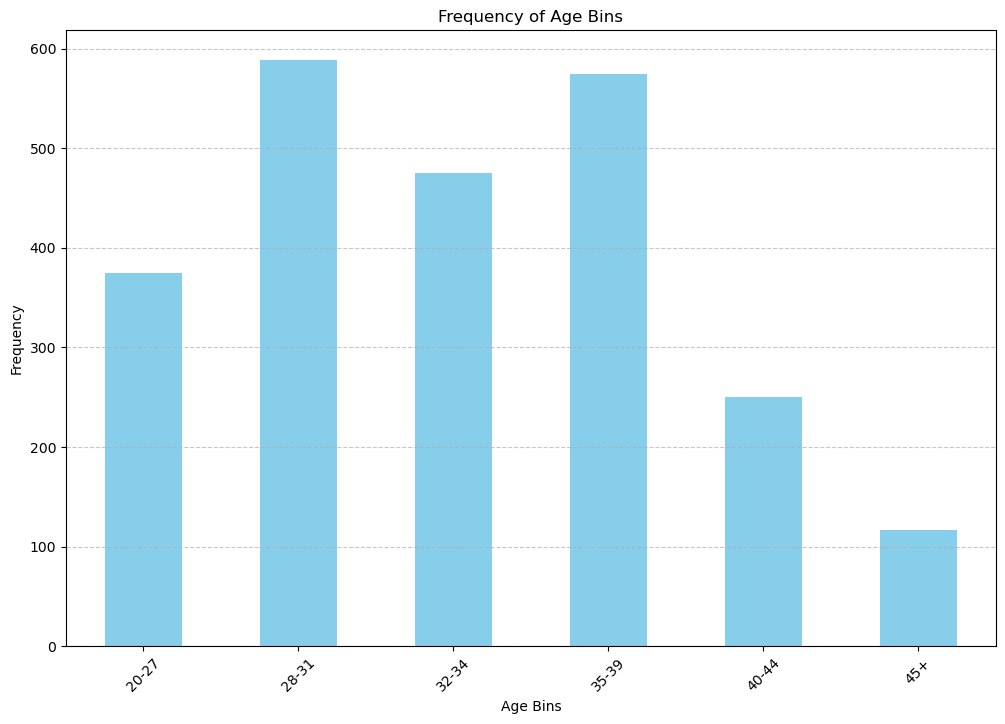

In [49]:
plt.figure(figsize=(12, 8))

agg_df['Age_Binned'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Frequency of Age Bins')
plt.xlabel('Age Bins')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [50]:
# Converting the age_binned column to dtype object.
agg_df['Age_Binned'] = agg_df['Age_Binned'].astype('object')

In [51]:
cat_cols = agg_df.dtypes == 'object'
cat_cols = list(cat_cols[cat_cols].index)
cat_cols

['City',
 'ReportingMonth',
 'ReportingWeek',
 'JoiningMonth',
 'JoiningWeek',
 'LastWorkingMonth',
 'LastWorkingYear',
 'LastWorkingWeek',
 'Age_Binned']

#### Converting Categorical to Numerical using TargetEncoding

In [52]:
encoder = TargetEncoder()

for column in cat_cols:
    X = agg_df[[column]]
    y = agg_df['target']  
    
    agg_df[column] = encoder.fit_transform(X, y)

In [53]:
agg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Driver_ID             2381 non-null   int64  
 1   Age                   2381 non-null   int32  
 2   Gender                2381 non-null   int32  
 3   City                  2381 non-null   float64
 4   Education_Level       2381 non-null   int64  
 5   Income                2381 non-null   int64  
 6   Joining Designation   2381 non-null   int64  
 7   Grade                 2381 non-null   int64  
 8   Total Business Value  2381 non-null   int64  
 9   Quarterly Rating      2381 non-null   int64  
 10  ReportingMonth        2381 non-null   float64
 11  ReportingYear         2381 non-null   int32  
 12  ReportingWeek         2381 non-null   float64
 13  JoiningMonth          2381 non-null   float64
 14  JoiningYear           2381 non-null   int32  
 15  JoiningWeek          

In [54]:
agg_df.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,...,JoiningMonth,JoiningYear,JoiningWeek,LastWorkingMonth,LastWorkingYear,LastWorkingWeek,target,Rating_Increase,Income_Increase,Age_Binned
0,1,28,0,0.769859,2,57387,1,1,1715580,2,...,0.580952,2018,0.663158,0.999996,1.0,1.0,1,0,0,0.697793
1,2,31,0,0.684190,2,67016,2,2,0,1,...,0.604743,2020,0.613288,0.000000,0.0,0.0,0,0,0,0.697793
2,4,43,0,0.816064,2,65603,2,2,350000,1,...,0.580952,2019,0.709333,0.999735,1.0,1.0,1,0,0,0.644000
3,5,29,0,0.706553,0,46368,1,1,120360,1,...,0.804878,2019,0.822996,0.999996,1.0,1.0,1,0,0,0.697793
4,6,31,1,0.702829,1,78728,3,3,1265000,2,...,0.648649,2020,0.613288,0.000000,0.0,0.0,0,1,0,0.697793


#### Multicollinearity Check Using Variance Inflation Factor

In [55]:
# Separating the target column from the original dataframe and storing it in dependent variable.
dependent_variable = agg_df['target']

# Dropping the column Chance of Admit from original dataframe.
independent_variable = agg_df.drop(['target','Driver_ID'],axis=1)

# Retrieving the shape of independent_variable and dependent_variable.
independent_variable.shape,dependent_variable.shape

((2381, 21), (2381,))

In [56]:
# Training the model to check the VIF value to observe the multicolinearity among the features. If the VIF is greater than 10 then it's highly correlated.
sc = StandardScaler()
iv_scaled = sc.fit_transform(independent_variable)

In [57]:
# Fetching the VIF score for each independent feature and the score should be between 1 - 5, so they confirm that indivially each feature contribute to obtain the target label
vif_data = pd.DataFrame()

x_t = pd.DataFrame(iv_scaled,columns=independent_variable.columns)

vif_data["Variable"] = x_t.columns
vif_data["VIF"] = [variance_inflation_factor(x_t.values, i) for i in range(x_t.shape[1])]

vif_data = vif_data.sort_values(by='VIF', ascending = False)
vif_data

,Variable,VIF
17,LastWorkingWeek,164092.066600
15,LastWorkingMonth,162078.158772
16,LastWorkingYear,1524.380040
6,Grade,6.554758
5,Joining Designation,4.832686
8,Quarterly Rating,4.414674
7,Total Business Value,3.900560
13,JoiningYear,3.118932
18,Rating_Increase,2.939885
0,Age,2.707383


In [58]:
independent_variable.drop(columns = ['LastWorkingWeek','LastWorkingMonth','LastWorkingYear'],inplace = True)

In [59]:
iv_scaled = sc.fit_transform(independent_variable)
vif_data = pd.DataFrame()

x_t = pd.DataFrame(iv_scaled,columns=independent_variable.columns)

vif_data["Variable"] = x_t.columns
vif_data["VIF"] = [variance_inflation_factor(x_t.values, i) for i in range(x_t.shape[1])]

vif_data = vif_data.sort_values(by='VIF', ascending = False)
vif_data

,Variable,VIF
6,Grade,6.531871
5,Joining Designation,4.816141
8,Quarterly Rating,4.303706
7,Total Business Value,3.843056
13,JoiningYear,3.103964
15,Rating_Increase,2.926814
0,Age,2.705548
17,Age_Binned,2.595106
4,Income,2.422147
10,ReportingYear,1.696398


In [60]:
independent_variable.drop(columns = ['Grade'],inplace = True)

In [61]:
iv_scaled = sc.fit_transform(independent_variable)
vif_data = pd.DataFrame()

x_t = pd.DataFrame(iv_scaled,columns=independent_variable.columns)

vif_data["Variable"] = x_t.columns
vif_data["VIF"] = [variance_inflation_factor(x_t.values, i) for i in range(x_t.shape[1])]

vif_data = vif_data.sort_values(by='VIF', ascending = False)
vif_data

,Variable,VIF
7,Quarterly Rating,4.071527
6,Total Business Value,3.329999
14,Rating_Increase,2.911254
0,Age,2.702682
16,Age_Binned,2.593944
12,JoiningYear,2.569379
4,Income,1.929073
5,Joining Designation,1.895033
9,ReportingYear,1.675898
8,ReportingMonth,1.421781


In [62]:
dependent_variable.value_counts()

target
1    1616
0     765
Name: count, dtype: int64

#### SMOTE to address the class imbalance data

In [63]:
# The data is imbalance so we'll use SMOTE technique to balance the data
x_tr_cv, X_test, y_tr_cv, y_test = train_test_split(independent_variable,
                                                    dependent_variable,
                                                    test_size=0.3,
                                                    random_state=7,
                                                    stratify=dependent_variable)

x_train,x_val,y_train,y_val = train_test_split(x_tr_cv,y_tr_cv,test_size = 0.3,random_state=2)

print("Number transactions X_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_val dataset: ", x_val.shape)
print("Number transactions y_val dataset: ", y_val.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1166, 17)
Number transactions y_train dataset:  (1166,)
Number transactions x_val dataset:  (500, 17)
Number transactions y_val dataset:  (500,)
Number transactions X_test dataset:  (715, 17)
Number transactions y_test dataset:  (715,)


In [64]:
smt = SMOTE()
X_sm, y_sm = smt.fit_resample(x_train, y_train)

print('Resampled dataset shape {}'.format(Counter(y_sm)))

Resampled dataset shape Counter({1: 801, 0: 801})


#### Model building

#### Ensemble Learning Bagging

In [65]:
bagging_clf = BaggingClassifier(n_estimators=100, max_samples=0.8, max_features=0.8)

# Fit the classifier on the training data
bagging_clf.fit(X_sm, y_sm)

# Evaluating the classifier on the validation data
y_pred = bagging_clf.predict(x_val)
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

# Evaluating the classifier on the test data
y_pred = bagging_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Validation Accuracy: 0.886
Test Accuracy: 0.9006993006993007


#### Classification Report & ROC Curve : Bagging

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       230
           1       0.94      0.91      0.93       485

    accuracy                           0.90       715
   macro avg       0.88      0.89      0.89       715
weighted avg       0.90      0.90      0.90       715

ROC AUC Score: 0.9501837740923352


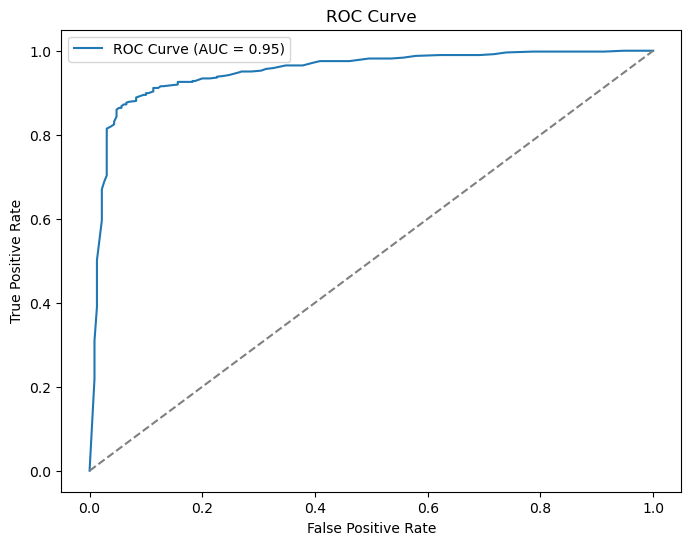

In [74]:
y_pred = bagging_clf.predict(X_test)
y_proba = bagging_clf.predict_proba(X_test)[:, 1] 

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculating ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", roc_auc)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### Ensemble Learning Boosting

In [67]:
gb_clf = GradientBoostingClassifier()

# Defining the hyperparameters to tune
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],  
    'n_estimators': [50, 100, 200],      
    'max_depth': [3, 5, 7]               
}

# Performing grid search cross-validation
grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_sm, y_sm)

print("Best Hyperparameters:", grid_search.best_params_)

# Evaluating the model with the best hyperparameters on the validation data
best_gb_clf = grid_search.best_estimator_
y_pred_best = best_gb_clf.predict(x_val)
accuracy_best = accuracy_score(y_val, y_pred_best)
print("Validation Accuracy with Best Hyperparameters:", accuracy_best)

# Evaluating the model with the best hyperparameters on the test data
y_pred_best = best_gb_clf.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Test Accuracy with Best Hyperparameters:", accuracy_best)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Validation Accuracy with Best Hyperparameters: 0.89
Test Accuracy with Best Hyperparameters: 0.8993006993006993


#### Feature Importance

In [68]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_sm, y_sm)

feature_importances = gb_clf.feature_importances_

sorted_indices = feature_importances.argsort()[::-1]

feature_names = X_sm.columns

# Creating a DataFrame to display the feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': np.round(feature_importances,3)})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
9,ReportingYear,0.465
6,Total Business Value,0.155
10,ReportingWeek,0.149
8,ReportingMonth,0.094
11,JoiningMonth,0.036
12,JoiningYear,0.027
4,Income,0.023
16,Age_Binned,0.009
7,Quarterly Rating,0.008
13,JoiningWeek,0.008


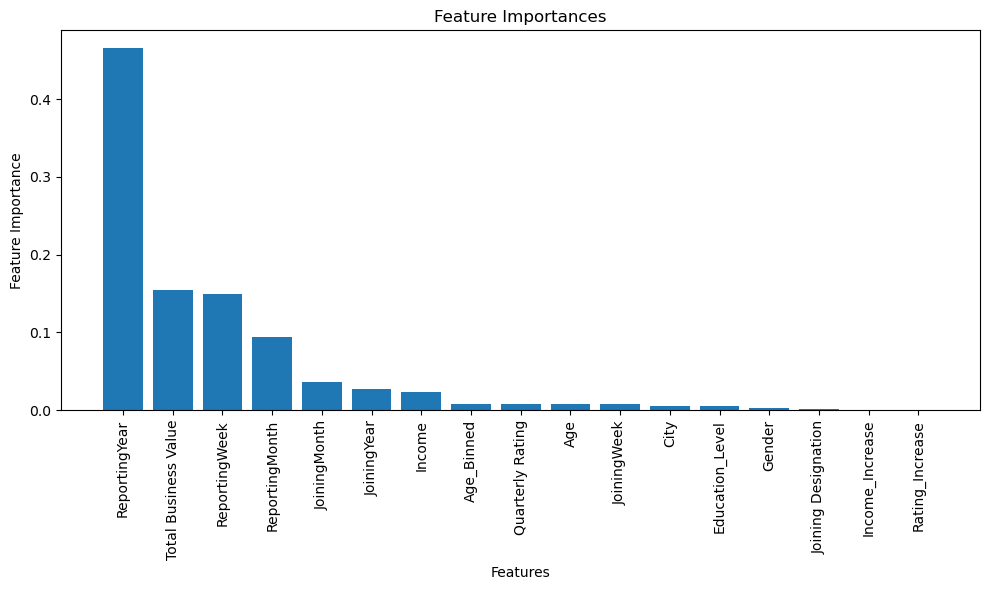

In [73]:
# Plotting feature importances in descending order
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_indices)), feature_importances[sorted_indices], align='center')
plt.xticks(range(len(sorted_indices)), [feature_names[i] for i in sorted_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

#### Classification Report & ROC Curve : Boosting

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       230
           1       0.94      0.93      0.93       485

    accuracy                           0.91       715
   macro avg       0.90      0.90      0.90       715
weighted avg       0.91      0.91      0.91       715

ROC AUC Score: 0.9549529359031824


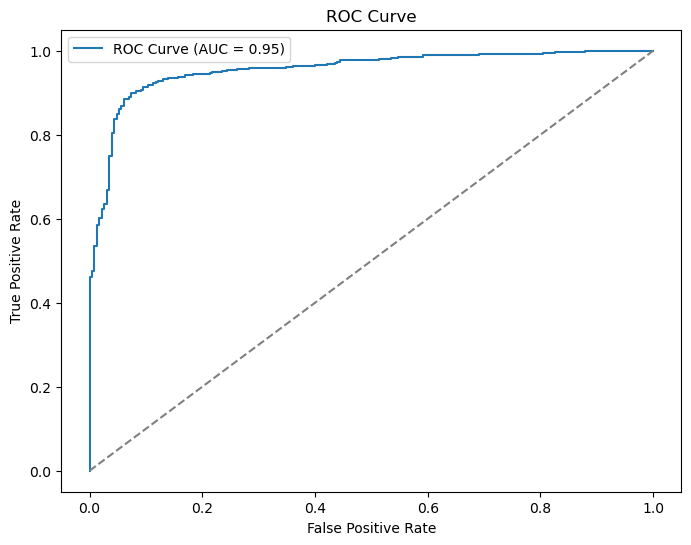

In [72]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_sm, y_sm)

y_pred = gb_clf.predict(X_test)
y_proba = gb_clf.predict_proba(X_test)[:, 1] 

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculating ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### Business Insights

#### 1. From the given data there are 1401 Male Ola drivers and 980 Female Ola drivers with contribution of max Total Business Value of 69867900 and 95331060 respectively.
#### 2. Among the top three cities where there are maximum Ola drivers are C20 - 152 , C15 - 101 and C29 - 96 and they have joined since 2013.
#### 3. Among the Ola drivers 802 drivers are graduate among which 477 are male drivers and 325 are female drivers.
#### 4. Around 1026 Ola drivers have joined the company with a joining designation of 1 and around 11 drivers have joined with designation 5. 
#### 5. 164 Ola drivers joined in the month of January followed by April with a count of 104 joiners and March having the lowest joiners with count of 57 and around 587 drivers join in the end of the week i.e Friday.
#### 6. The max age of a Ola driver is 58 and the minimum age is 21.
#### 7. The quaterly rating has increased for 1396 Male Ola drivers and for 985 Female Ola drivers. Overall the rating has been increased for 41.4% of the total Ola driver#### 8. Most of the Male and Female Ola drivers are of grade 2 and 1.
#### 9. Around 50.5% of the Ola drivers have a rating of 1 and 14.3% are having a quarterly rating of 4.
#### 10. C15 has the most improvement in Quaterly rating.
#### 11. The Ola drivers with grade 5 contribute a higher business value of 95331060 while grade 1 contribute 30869270.
#### 12. The average income of the Ola drivers is around 59336.15 with a maximum income of 188418 and minimum of 10747.
#### 13. Ola drivers With a quarterly rating of 1 are around 953 and they move out of the company when compared to rating 4 their count is just 106 who move out.
#### 14. In the city C20 around 111 Ola drivers are moving out of the company.
#### 15. Most of the Male(945) and Female(671) Ola drivers are having last working date in the company.
#### 16. Grade 2 and 1 are more likely to move out of the company and with joining designation of 1(752) and 2(560) are moving out of the company.
#### 17. Male Ola drivers whose monthly salary is not increased are likely to move out and the count is 1613. 
#### 18. Similarly there are 1075 Male and 541 Female Ola drivers whose rating is not increased will be moving out of the company.
#### 19. For the given data we perfomed the outlier treatment IQR on the features and observed existence of outliers so we clip the values between lower and outer bound for respective columns to remove any outliers.
#### 20. We categorized the age into multiple age groups and identified that the age group of 28-31 and 35-39 are having more than 550 ola drivers in each group.
#### 21. Also when plotted the graph showed the normal distribution with no skewness.
#### 22. We performed the TargetEncoder on the categorical columns and filled the missing values in Age and Gender column by KNNImputer.
#### 23. We calculated the Variance Inflation Factor for each independent feature upon considering it as target variable with respect to other independent feature and removed the features with VIF more than 5.
#### 24. The remaining independent features are having a VIF score less than 5 indicating them to be non collinear with each other.
#### 25. We addressed the imbalanced data by using SMOTE technique.
#### 26. We trained the data for 70% of the samples and remaining samples are for the test data also considering among the 70% training data considering 30% into validation data.
#### 27. The classifier achieved a validation accuracy of 88.6% and a test accuracy of 90.07%. 
#### 28. The precision for class 0 (drivers who stayed) was 0.82, and for class 1 (drivers who left), it was 0.94. 
#### 29. The recall for class 0 was 0.88, and for class 1, it was 0.91. These metrics indicate that the classifier effectively identified both drivers who stayed and those who left the company. 
#### 30. The ROC AUC score for the classifier is 0.95, indicating that the model performed well in distinguishing between the  positive and negative classes.
s.
